# Notice: Py-Feat ver 0.3.7 ONLY

## check your env is py37feat1

In [1]:
!pip list | grep feat
!python --version
!conda env list

py-feat                       0.3.7
Python 3.7.12
# conda environments:
#
base                     /home/dongagent/anaconda3
py37pyfeat1           *  /home/dongagent/anaconda3/envs/py37pyfeat1
py38featlatest           /home/dongagent/anaconda3/envs/py38featlatest
pyfeat_py310             /home/dongagent/anaconda3/envs/pyfeat_py310



In [ ]:
import os
def checkEmoOrder(folderPath, emo):
    if os.path.exists(folderPath):
        target_emotion = 'anger'
        folderName = os.path.join('image_analysis/anger/')
        ls_name = os.listdir(folderName)
    #     print(ls_name)
        result_dic = {}

        for i in ls_name:
            if 'emotion' in i:
                mypath = os.path.join(folderPath, i)
                temp = pd.read_csv(mypath)
                result = temp[target_emotion][0]
                result = round(result, 6)
                fileName = temp['input'][0]
                result_dic[i[:-12] + '.png'] = result
        # sort in value order 
        res_value_order = sorted(result_dic.items(), key=lambda item: item[1], reverse = True)

#         ##### choose top 10
#         res_value_order = res_value_order[:10]
#         print(target_emotion)
#     #     print(len(res_value_order))
#     #     print(len(res_value_order))
#         for i in res_value_order:
#             print(i)
#         print()
        return res_value_order
    else:
        print("folderNameNotExists")
        
# Test
anger_res = checkEmoOrder('image_analysis/anger/', 'anger')
print(anger_res[:10])

# comparison of different baseline and pyfeat values

Loading Face Detection model:  retinaface
Using downloaded and verified file: /home/dongagent/anaconda3/envs/py37pyfeat1/lib/python3.7/site-packages/py_feat-0.3.7-py3.7.egg/feat/resources/mobilenet0.25_Final.pth
Using downloaded and verified file: /home/dongagent/anaconda3/envs/py37pyfeat1/lib/python3.7/site-packages/py_feat-0.3.7-py3.7.egg/feat/resources/mobilefacenet_model_best.pth.tar
Using downloaded and verified file: /home/dongagent/anaconda3/envs/py37pyfeat1/lib/python3.7/site-packages/py_feat-0.3.7-py3.7.egg/feat/resources/hog_pca_all_emotio.joblib
Using downloaded and verified file: /home/dongagent/anaconda3/envs/py37pyfeat1/lib/python3.7/site-packages/py_feat-0.3.7-py3.7.egg/feat/resources/hog_pca_all_emotio.joblib
Using downloaded and verified file: /home/dongagent/anaconda3/envs/py37pyfeat1/lib/python3.7/site-packages/py_feat-0.3.7-py3.7.egg/feat/resources/hog_scalar_aus.joblib
Using downloaded and verified file: /home/dongagent/anaconda3/envs/py37pyfeat1/lib/python3.7/site

/home/dongagent/anaconda3/envs/py37pyfeat1/lib/python3.7/site-packages/sklearn/base.py:333: UserWarning: Trying to unpickle estimator PCA from version 0.24.1 when using version 1.0.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
/home/dongagent/anaconda3/envs/py37pyfeat1/lib/python3.7/site-packages/sklearn/base.py:333: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.24.1 when using version 1.0.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
/home/dongagent/anaconda3/envs/py37pyfeat1/lib/python3.7/site-packages/sklearn/base.py:333: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0

Loading emotion model:  resmasknet
image_analysis/231225Exp17NewFeat/prototypes/anger/Prototype_anger.png
[511.85226, 226.58049, 760.38696, 533.24194]
      anger   disgust      fear  happiness   sadness  surprise   neutral  \
0  0.051941  0.019394  0.028614   0.001584  0.030036  0.430996  0.437434   

                                               input  
0  image_analysis/231225Exp17NewFeat/prototypes/a...  
image_analysis/241122Exp31Mixed_v4_alpha0.6_300/anger_v4/2024_11_22_15_49_30_anger_1.png
[513.96106, 235.88953, 768.98816, 540.6678]


(-0.5, 1279.5, 719.5, -0.5)

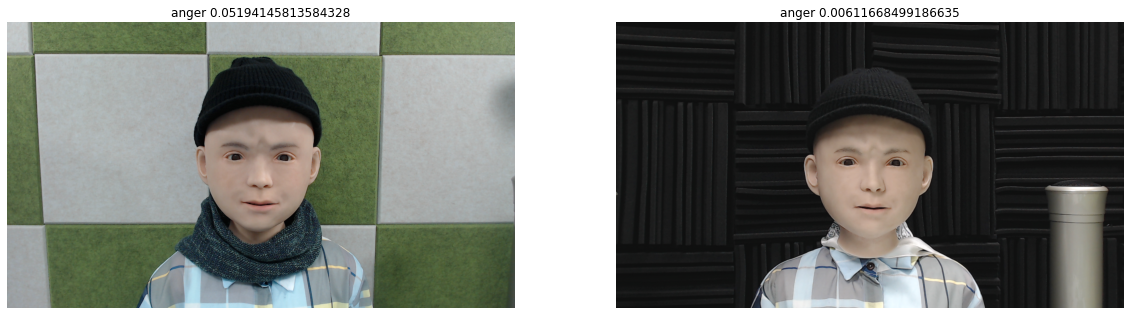

In [13]:
import pandas as pd
from feat import Detector
import os
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from resmasknet import ResMaskNet

detector = Detector(emotion_model = "resmasknet", landmark_model='mobilefacenet')

def get_box(start_x, start_y, end_x, end_y):
    center_x, center_y = (start_x + end_x) // 2, (start_y + end_y) // 2
    square_length = ((end_x - start_x) + (end_y - start_y)) // 2 // 2
    square_length *= 1.1
    start_x = int(center_x - square_length)
    start_y = int(center_y - square_length)
    end_x = int(center_x + square_length)
    end_y = int(center_y + square_length)
    return start_x, start_y, end_x, end_y
def ensure_color(image):
    if len(image.shape) == 2:
        return np.dstack([image] * 3)
    elif image.shape[2] == 1:
        return np.dstack([image] * 3)
    return image
def get_target(emotion_name):
    # Anger, Disgust, Fear, Happiness, Sadness, Surprise, Neutral
    # or lowercase
    if emotion_name in ["Anger", "anger"]:
        return 0
    elif emotion_name in ["Disgust", "disgust"]:
        return 1
    elif emotion_name in ["Fear", "fear"]:
        return 2
    elif emotion_name in ["Happiness", "happiness"]:
        return 3
    elif emotion_name in ["Sadness", "sadness"]:
        return 4
    elif emotion_name in ["Surprise", "surprise"]:
        return 5
    elif emotion_name in ["Neutral", "neutral"]:
        return 6
    
# old
image_name = 'image_analysis/231225Exp17NewFeat/prototypes/anger/Prototype_anger.png'
target_emotion = 'anger'

facebox = detector.detect_faces(cv2.imread(image_name))[0][:4]
rmn_model = ResMaskNet()
targetID = get_target(target_emotion)
print(image_name)
print(facebox)
rmn_res = rmn_model.detect_emo(frame=cv2.imread(image_name), detected_face=[facebox])
new_df = pd.DataFrame(rmn_res, columns=["anger", "disgust", "fear", "happiness", "sadness", "surprise", "neutral"])
new_df['input'] = image_name

print(new_df)
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Original image
testframe = cv2.imread(image_name)
b,g,r = cv2.split(testframe)
frame_rgb = cv2.merge((r,g,b))
axes[0].imshow(frame_rgb)
axes[0].set_title(f'{target_emotion} {list(new_df[target_emotion])[0]}')
axes[0].axis("off")


image_name = 'image_analysis/241122Exp31Mixed_v4_alpha0.6_300/anger_v4/2024_11_22_15_49_30_anger_1.png'
target_emotion = 'anger'

facebox = detector.detect_faces(cv2.imread(image_name))[0][:4]
rmn_model = ResMaskNet()
targetID = get_target(target_emotion)
print(image_name)
print(facebox)
rmn_res = rmn_model.detect_emo(frame=cv2.imread(image_name), detected_face=[facebox])
new_df = pd.DataFrame(rmn_res, columns=["anger", "disgust", "fear", "happiness", "sadness", "surprise", "neutral"])
new_df['input'] = image_name

face = cv2.imread(image_name)
b,g,r = cv2.split(face)
face_rgb = cv2.merge((r,g,b))
axes[1].imshow(face_rgb)
axes[1].set_title(f'{target_emotion} {list(new_df[target_emotion])[0]}')
axes[1].axis("off")


Loading Face Detection model:  retinaface
Using downloaded and verified file: /home/dongagent/anaconda3/envs/py37pyfeat1/lib/python3.7/site-packages/py_feat-0.3.7-py3.7.egg/feat/resources/mobilenet0.25_Final.pth
Using downloaded and verified file: /home/dongagent/anaconda3/envs/py37pyfeat1/lib/python3.7/site-packages/py_feat-0.3.7-py3.7.egg/feat/resources/mobilefacenet_model_best.pth.tar
Using downloaded and verified file: /home/dongagent/anaconda3/envs/py37pyfeat1/lib/python3.7/site-packages/py_feat-0.3.7-py3.7.egg/feat/resources/hog_pca_all_emotio.joblib
Using downloaded and verified file: /home/dongagent/anaconda3/envs/py37pyfeat1/lib/python3.7/site-packages/py_feat-0.3.7-py3.7.egg/feat/resources/hog_pca_all_emotio.joblib
Using downloaded and verified file: /home/dongagent/anaconda3/envs/py37pyfeat1/lib/python3.7/site-packages/py_feat-0.3.7-py3.7.egg/feat/resources/hog_scalar_aus.joblib
Using downloaded and verified file: /home/dongagent/anaconda3/envs/py37pyfeat1/lib/python3.7/site

/home/dongagent/anaconda3/envs/py37pyfeat1/lib/python3.7/site-packages/sklearn/base.py:333: UserWarning: Trying to unpickle estimator PCA from version 0.24.1 when using version 1.0.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
/home/dongagent/anaconda3/envs/py37pyfeat1/lib/python3.7/site-packages/sklearn/base.py:333: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.24.1 when using version 1.0.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
/home/dongagent/anaconda3/envs/py37pyfeat1/lib/python3.7/site-packages/sklearn/base.py:333: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0

Loading emotion model:  resmasknet
image_analysis/231225Exp17NewFeat/prototypes/disgust/Prototype_disgust.png
[512.3982, 224.83926, 761.70807, 531.4913]
      anger   disgust      fear  happiness   sadness  surprise   neutral  \
0  0.029831  0.071454  0.010466    0.00122  0.068491  0.173487  0.645051   

                                               input  
0  image_analysis/231225Exp17NewFeat/prototypes/d...  
image_analysis/241122Exp31Mixed_v4_alpha0.6_300/disgust_v4/2024_11_22_16_18_40_disgust_1.png
[516.7636, 235.33363, 766.53735, 535.0416]


(-0.5, 1279.5, 719.5, -0.5)

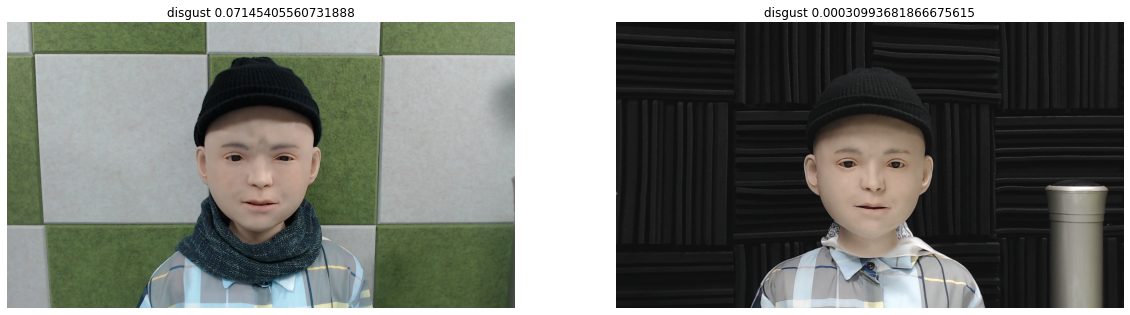

In [16]:
import pandas as pd
from feat import Detector
import os
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from resmasknet import ResMaskNet

detector = Detector(emotion_model = "resmasknet", landmark_model='mobilefacenet')

def get_box(start_x, start_y, end_x, end_y):
    center_x, center_y = (start_x + end_x) // 2, (start_y + end_y) // 2
    square_length = ((end_x - start_x) + (end_y - start_y)) // 2 // 2
    square_length *= 1.1
    start_x = int(center_x - square_length)
    start_y = int(center_y - square_length)
    end_x = int(center_x + square_length)
    end_y = int(center_y + square_length)
    return start_x, start_y, end_x, end_y
def ensure_color(image):
    if len(image.shape) == 2:
        return np.dstack([image] * 3)
    elif image.shape[2] == 1:
        return np.dstack([image] * 3)
    return image
    
# old
image_name = 'image_analysis/231225Exp17NewFeat/prototypes/disgust/Prototype_disgust.png'
target_emotion = 'disgust'

facebox = detector.detect_faces(cv2.imread(image_name))[0][:4]
rmn_model = ResMaskNet()
print(image_name)
print(facebox)
rmn_res = rmn_model.detect_emo(frame=cv2.imread(image_name), detected_face=[facebox])
new_df = pd.DataFrame(rmn_res, columns=["anger", "disgust", "fear", "happiness", "sadness", "surprise", "neutral"])
new_df['input'] = image_name

print(new_df)
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Original image
testframe = cv2.imread(image_name)
b,g,r = cv2.split(testframe)
frame_rgb = cv2.merge((r,g,b))
axes[0].imshow(frame_rgb)
axes[0].set_title(f'{target_emotion} {list(new_df[target_emotion])[0]}')
axes[0].axis("off")


image_name = 'image_analysis/241122Exp31Mixed_v4_alpha0.6_300/disgust_v4/2024_11_22_16_18_40_disgust_1.png'
target_emotion = 'disgust'

facebox = detector.detect_faces(cv2.imread(image_name))[0][:4]
rmn_model = ResMaskNet()
print(image_name)
print(facebox)
rmn_res = rmn_model.detect_emo(frame=cv2.imread(image_name), detected_face=[facebox])
new_df = pd.DataFrame(rmn_res, columns=["anger", "disgust", "fear", "happiness", "sadness", "surprise", "neutral"])
new_df['input'] = image_name

face = cv2.imread(image_name)
b,g,r = cv2.split(face)
face_rgb = cv2.merge((r,g,b))
axes[1].imshow(face_rgb)
axes[1].set_title(f'{target_emotion} {list(new_df[target_emotion])[0]}')
axes[1].axis("off")


Loading Face Detection model:  retinaface
Using downloaded and verified file: /home/dongagent/anaconda3/envs/py37pyfeat1/lib/python3.7/site-packages/py_feat-0.3.7-py3.7.egg/feat/resources/mobilenet0.25_Final.pth
Using downloaded and verified file: /home/dongagent/anaconda3/envs/py37pyfeat1/lib/python3.7/site-packages/py_feat-0.3.7-py3.7.egg/feat/resources/mobilefacenet_model_best.pth.tar
Using downloaded and verified file: /home/dongagent/anaconda3/envs/py37pyfeat1/lib/python3.7/site-packages/py_feat-0.3.7-py3.7.egg/feat/resources/hog_pca_all_emotio.joblib
Using downloaded and verified file: /home/dongagent/anaconda3/envs/py37pyfeat1/lib/python3.7/site-packages/py_feat-0.3.7-py3.7.egg/feat/resources/hog_pca_all_emotio.joblib
Using downloaded and verified file: /home/dongagent/anaconda3/envs/py37pyfeat1/lib/python3.7/site-packages/py_feat-0.3.7-py3.7.egg/feat/resources/hog_scalar_aus.joblib
Using downloaded and verified file: /home/dongagent/anaconda3/envs/py37pyfeat1/lib/python3.7/site

/home/dongagent/anaconda3/envs/py37pyfeat1/lib/python3.7/site-packages/sklearn/base.py:333: UserWarning: Trying to unpickle estimator PCA from version 0.24.1 when using version 1.0.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
/home/dongagent/anaconda3/envs/py37pyfeat1/lib/python3.7/site-packages/sklearn/base.py:333: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.24.1 when using version 1.0.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
/home/dongagent/anaconda3/envs/py37pyfeat1/lib/python3.7/site-packages/sklearn/base.py:333: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0

Loading emotion model:  resmasknet
image_analysis/231225Exp17NewFeat/prototypes/fear/Prototype_fear_test.png
[509.52838, 223.13147, 760.0801, 530.5997]
      anger   disgust      fear  happiness   sadness  surprise   neutral  \
0  0.007208  0.020246  0.018378    0.00607  0.112411  0.315883  0.519804   

                                               input  
0  image_analysis/231225Exp17NewFeat/prototypes/f...  
image_analysis/241122Exp31Mixed_v4_alpha0.6_300/fear/2024_11_22_16_39_12_fear_1.png
[517.52783, 233.55539, 766.1559, 534.9575]


(-0.5, 1279.5, 719.5, -0.5)

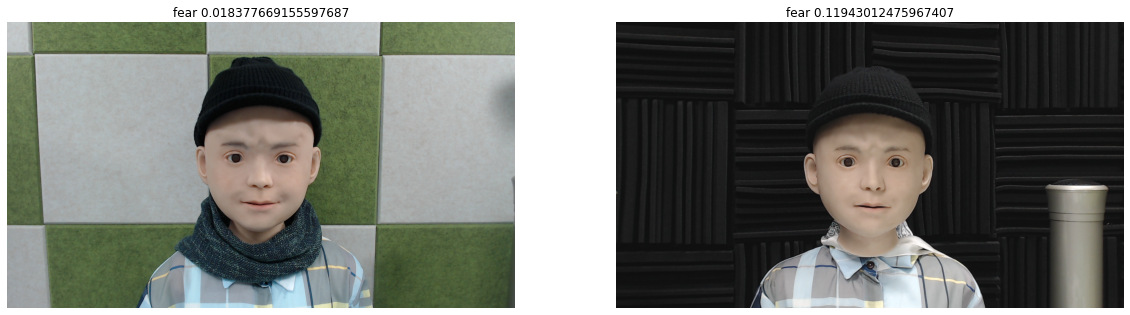

In [17]:
import pandas as pd
from feat import Detector
import os
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from resmasknet import ResMaskNet

detector = Detector(emotion_model = "resmasknet", landmark_model='mobilefacenet')

def get_box(start_x, start_y, end_x, end_y):
    center_x, center_y = (start_x + end_x) // 2, (start_y + end_y) // 2
    square_length = ((end_x - start_x) + (end_y - start_y)) // 2 // 2
    square_length *= 1.1
    start_x = int(center_x - square_length)
    start_y = int(center_y - square_length)
    end_x = int(center_x + square_length)
    end_y = int(center_y + square_length)
    return start_x, start_y, end_x, end_y
def ensure_color(image):
    if len(image.shape) == 2:
        return np.dstack([image] * 3)
    elif image.shape[2] == 1:
        return np.dstack([image] * 3)
    return image
    
# old
image_name = 'image_analysis/231225Exp17NewFeat/prototypes/fear/Prototype_fear_test.png'
target_emotion = 'fear'

facebox = detector.detect_faces(cv2.imread(image_name))[0][:4]
rmn_model = ResMaskNet()
print(image_name)
print(facebox)
rmn_res = rmn_model.detect_emo(frame=cv2.imread(image_name), detected_face=[facebox])
new_df = pd.DataFrame(rmn_res, columns=["anger", "disgust", "fear", "happiness", "sadness", "surprise", "neutral"])
new_df['input'] = image_name

print(new_df)
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Original image
testframe = cv2.imread(image_name)
b,g,r = cv2.split(testframe)
frame_rgb = cv2.merge((r,g,b))
axes[0].imshow(frame_rgb)
axes[0].set_title(f'{target_emotion} {list(new_df[target_emotion])[0]}')
axes[0].axis("off")


image_name = 'image_analysis/241122Exp31Mixed_v4_alpha0.6_300/fear/2024_11_22_16_39_12_fear_1.png'

facebox = detector.detect_faces(cv2.imread(image_name))[0][:4]
rmn_model = ResMaskNet()
print(image_name)
print(facebox)
rmn_res = rmn_model.detect_emo(frame=cv2.imread(image_name), detected_face=[facebox])
new_df = pd.DataFrame(rmn_res, columns=["anger", "disgust", "fear", "happiness", "sadness", "surprise", "neutral"])
new_df['input'] = image_name

face = cv2.imread(image_name)
b,g,r = cv2.split(face)
face_rgb = cv2.merge((r,g,b))
axes[1].imshow(face_rgb)
axes[1].set_title(f'{target_emotion} {list(new_df[target_emotion])[0]}')
axes[1].axis("off")


Loading Face Detection model:  retinaface
Using downloaded and verified file: /home/dongagent/anaconda3/envs/py37pyfeat1/lib/python3.7/site-packages/py_feat-0.3.7-py3.7.egg/feat/resources/mobilenet0.25_Final.pth
Using downloaded and verified file: /home/dongagent/anaconda3/envs/py37pyfeat1/lib/python3.7/site-packages/py_feat-0.3.7-py3.7.egg/feat/resources/mobilefacenet_model_best.pth.tar
Using downloaded and verified file: /home/dongagent/anaconda3/envs/py37pyfeat1/lib/python3.7/site-packages/py_feat-0.3.7-py3.7.egg/feat/resources/hog_pca_all_emotio.joblib
Using downloaded and verified file: /home/dongagent/anaconda3/envs/py37pyfeat1/lib/python3.7/site-packages/py_feat-0.3.7-py3.7.egg/feat/resources/hog_pca_all_emotio.joblib
Using downloaded and verified file: /home/dongagent/anaconda3/envs/py37pyfeat1/lib/python3.7/site-packages/py_feat-0.3.7-py3.7.egg/feat/resources/hog_scalar_aus.joblib
Using downloaded and verified file: /home/dongagent/anaconda3/envs/py37pyfeat1/lib/python3.7/site

/home/dongagent/anaconda3/envs/py37pyfeat1/lib/python3.7/site-packages/sklearn/base.py:333: UserWarning: Trying to unpickle estimator PCA from version 0.24.1 when using version 1.0.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
/home/dongagent/anaconda3/envs/py37pyfeat1/lib/python3.7/site-packages/sklearn/base.py:333: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.24.1 when using version 1.0.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
/home/dongagent/anaconda3/envs/py37pyfeat1/lib/python3.7/site-packages/sklearn/base.py:333: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0

Loading emotion model:  resmasknet
image_analysis/231225Exp17NewFeat/prototypes/happiness/Prototype_happiness_test.png
[512.65106, 230.26912, 761.362, 533.6174]
      anger   disgust      fear  happiness   sadness  surprise   neutral  \
0  0.012698  0.043487  0.007108    0.29224  0.087523  0.049508  0.507437   

                                               input  
0  image_analysis/231225Exp17NewFeat/prototypes/h...  
image_analysis/241122Exp31Mixed_v4_alpha0.6_300/happiness/2024_11_22_16_54_34_happiness_1.png
[515.6282, 233.88878, 765.3856, 537.02966]


(-0.5, 1279.5, 719.5, -0.5)

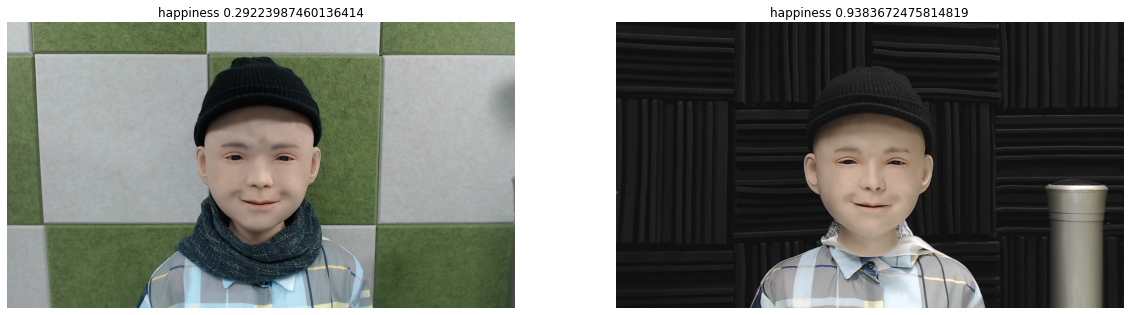

In [14]:
import pandas as pd
from feat import Detector
import os
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from resmasknet import ResMaskNet

detector = Detector(emotion_model = "resmasknet", landmark_model='mobilefacenet')

def get_box(start_x, start_y, end_x, end_y):
    center_x, center_y = (start_x + end_x) // 2, (start_y + end_y) // 2
    square_length = ((end_x - start_x) + (end_y - start_y)) // 2 // 2
    square_length *= 1.1
    start_x = int(center_x - square_length)
    start_y = int(center_y - square_length)
    end_x = int(center_x + square_length)
    end_y = int(center_y + square_length)
    return start_x, start_y, end_x, end_y
def ensure_color(image):
    if len(image.shape) == 2:
        return np.dstack([image] * 3)
    elif image.shape[2] == 1:
        return np.dstack([image] * 3)
    return image
def get_target(emotion_name):
    # Anger, Disgust, Fear, Happiness, Sadness, Surprise, Neutral
    # or lowercase
    if emotion_name in ["Anger", "anger"]:
        return 0
    elif emotion_name in ["Disgust", "disgust"]:
        return 1
    elif emotion_name in ["Fear", "fear"]:
        return 2
    elif emotion_name in ["Happiness", "happiness"]:
        return 3
    elif emotion_name in ["Sadness", "sadness"]:
        return 4
    elif emotion_name in ["Surprise", "surprise"]:
        return 5
    elif emotion_name in ["Neutral", "neutral"]:
        return 6
    
# old
image_name = 'image_analysis/231225Exp17NewFeat/prototypes/happiness/Prototype_happiness_test.png'
target_emotion = 'happiness'

facebox = detector.detect_faces(cv2.imread(image_name))[0][:4]
rmn_model = ResMaskNet()
targetID = get_target(target_emotion)
print(image_name)
print(facebox)
rmn_res = rmn_model.detect_emo(frame=cv2.imread(image_name), detected_face=[facebox])
new_df = pd.DataFrame(rmn_res, columns=["anger", "disgust", "fear", "happiness", "sadness", "surprise", "neutral"])
new_df['input'] = image_name

print(new_df)
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Original image
testframe = cv2.imread(image_name)
b,g,r = cv2.split(testframe)
frame_rgb = cv2.merge((r,g,b))
axes[0].imshow(frame_rgb)
axes[0].set_title(f'{target_emotion} {list(new_df[target_emotion])[0]}')
axes[0].axis("off")


image_name = 'image_analysis/241122Exp31Mixed_v4_alpha0.6_300/happiness/2024_11_22_16_54_34_happiness_1.png'


facebox = detector.detect_faces(cv2.imread(image_name))[0][:4]
rmn_model = ResMaskNet()
targetID = get_target(target_emotion)
print(image_name)
print(facebox)
rmn_res = rmn_model.detect_emo(frame=cv2.imread(image_name), detected_face=[facebox])
new_df = pd.DataFrame(rmn_res, columns=["anger", "disgust", "fear", "happiness", "sadness", "surprise", "neutral"])
new_df['input'] = image_name

face = cv2.imread(image_name)
b,g,r = cv2.split(face)
face_rgb = cv2.merge((r,g,b))
axes[1].imshow(face_rgb)
axes[1].set_title(f'{target_emotion} {list(new_df[target_emotion])[0]}')
axes[1].axis("off")


Loading Face Detection model:  retinaface
Using downloaded and verified file: /home/dongagent/anaconda3/envs/py37pyfeat1/lib/python3.7/site-packages/py_feat-0.3.7-py3.7.egg/feat/resources/mobilenet0.25_Final.pth
Using downloaded and verified file: /home/dongagent/anaconda3/envs/py37pyfeat1/lib/python3.7/site-packages/py_feat-0.3.7-py3.7.egg/feat/resources/mobilefacenet_model_best.pth.tar
Using downloaded and verified file: /home/dongagent/anaconda3/envs/py37pyfeat1/lib/python3.7/site-packages/py_feat-0.3.7-py3.7.egg/feat/resources/hog_pca_all_emotio.joblib
Using downloaded and verified file: /home/dongagent/anaconda3/envs/py37pyfeat1/lib/python3.7/site-packages/py_feat-0.3.7-py3.7.egg/feat/resources/hog_pca_all_emotio.joblib
Using downloaded and verified file: /home/dongagent/anaconda3/envs/py37pyfeat1/lib/python3.7/site-packages/py_feat-0.3.7-py3.7.egg/feat/resources/hog_scalar_aus.joblib
Using downloaded and verified file: /home/dongagent/anaconda3/envs/py37pyfeat1/lib/python3.7/site

/home/dongagent/anaconda3/envs/py37pyfeat1/lib/python3.7/site-packages/sklearn/base.py:333: UserWarning: Trying to unpickle estimator PCA from version 0.24.1 when using version 1.0.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
/home/dongagent/anaconda3/envs/py37pyfeat1/lib/python3.7/site-packages/sklearn/base.py:333: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.24.1 when using version 1.0.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
/home/dongagent/anaconda3/envs/py37pyfeat1/lib/python3.7/site-packages/sklearn/base.py:333: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0

Loading emotion model:  resmasknet
image_analysis/231225Exp17NewFeat/prototypes/sadness/Prototype_sadness_test.png
[511.3678, 229.24266, 760.3605, 533.6165]
      anger   disgust      fear  happiness   sadness  surprise   neutral  \
0  0.016723  0.047247  0.023161   0.245874  0.257086    0.0485  0.361407   

                                               input  
0  image_analysis/231225Exp17NewFeat/prototypes/s...  
image_analysis/241122Exp31Mixed_v4_alpha0.6_300/sadness/2024_11_22_17_10_20_sadness_1.png
[515.60626, 234.65857, 766.9476, 535.18365]


(-0.5, 1279.5, 719.5, -0.5)

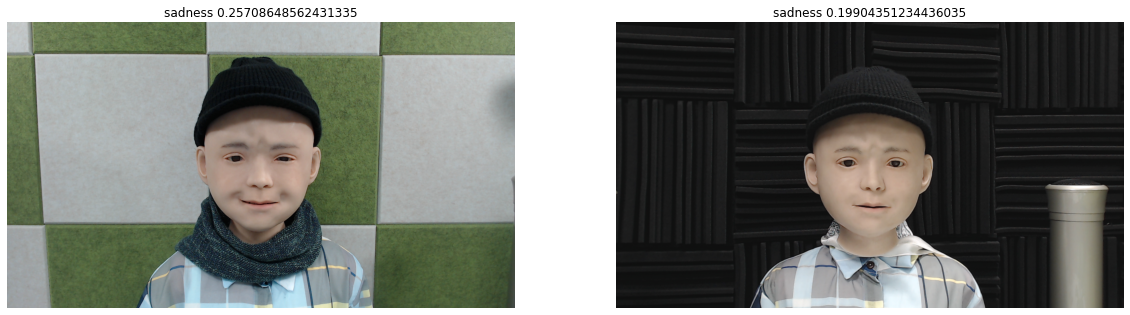

In [18]:
import pandas as pd
from feat import Detector
import os
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from resmasknet import ResMaskNet

detector = Detector(emotion_model = "resmasknet", landmark_model='mobilefacenet')

def get_box(start_x, start_y, end_x, end_y):
    center_x, center_y = (start_x + end_x) // 2, (start_y + end_y) // 2
    square_length = ((end_x - start_x) + (end_y - start_y)) // 2 // 2
    square_length *= 1.1
    start_x = int(center_x - square_length)
    start_y = int(center_y - square_length)
    end_x = int(center_x + square_length)
    end_y = int(center_y + square_length)
    return start_x, start_y, end_x, end_y
def ensure_color(image):
    if len(image.shape) == 2:
        return np.dstack([image] * 3)
    elif image.shape[2] == 1:
        return np.dstack([image] * 3)
    return image
    
# old
image_name = 'image_analysis/231225Exp17NewFeat/prototypes/sadness/Prototype_sadness_test.png'
target_emotion = 'sadness'

facebox = detector.detect_faces(cv2.imread(image_name))[0][:4]
rmn_model = ResMaskNet()
print(image_name)
print(facebox)
rmn_res = rmn_model.detect_emo(frame=cv2.imread(image_name), detected_face=[facebox])
new_df = pd.DataFrame(rmn_res, columns=["anger", "disgust", "fear", "happiness", "sadness", "surprise", "neutral"])
new_df['input'] = image_name

print(new_df)
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Original image
testframe = cv2.imread(image_name)
b,g,r = cv2.split(testframe)
frame_rgb = cv2.merge((r,g,b))
axes[0].imshow(frame_rgb)
axes[0].set_title(f'{target_emotion} {list(new_df[target_emotion])[0]}')
axes[0].axis("off")


image_name = 'image_analysis/241122Exp31Mixed_v4_alpha0.6_300/sadness/2024_11_22_17_10_20_sadness_1.png'

facebox = detector.detect_faces(cv2.imread(image_name))[0][:4]
rmn_model = ResMaskNet()
print(image_name)
print(facebox)
rmn_res = rmn_model.detect_emo(frame=cv2.imread(image_name), detected_face=[facebox])
new_df = pd.DataFrame(rmn_res, columns=["anger", "disgust", "fear", "happiness", "sadness", "surprise", "neutral"])
new_df['input'] = image_name

face = cv2.imread(image_name)
b,g,r = cv2.split(face)
face_rgb = cv2.merge((r,g,b))
axes[1].imshow(face_rgb)
axes[1].set_title(f'{target_emotion} {list(new_df[target_emotion])[0]}')
axes[1].axis("off")


Loading Face Detection model:  retinaface
Using downloaded and verified file: /home/dongagent/anaconda3/envs/py37pyfeat1/lib/python3.7/site-packages/py_feat-0.3.7-py3.7.egg/feat/resources/mobilenet0.25_Final.pth
Using downloaded and verified file: /home/dongagent/anaconda3/envs/py37pyfeat1/lib/python3.7/site-packages/py_feat-0.3.7-py3.7.egg/feat/resources/mobilefacenet_model_best.pth.tar
Using downloaded and verified file: /home/dongagent/anaconda3/envs/py37pyfeat1/lib/python3.7/site-packages/py_feat-0.3.7-py3.7.egg/feat/resources/hog_pca_all_emotio.joblib
Using downloaded and verified file: /home/dongagent/anaconda3/envs/py37pyfeat1/lib/python3.7/site-packages/py_feat-0.3.7-py3.7.egg/feat/resources/hog_pca_all_emotio.joblib
Using downloaded and verified file: /home/dongagent/anaconda3/envs/py37pyfeat1/lib/python3.7/site-packages/py_feat-0.3.7-py3.7.egg/feat/resources/hog_scalar_aus.joblib
Using downloaded and verified file: /home/dongagent/anaconda3/envs/py37pyfeat1/lib/python3.7/site

/home/dongagent/anaconda3/envs/py37pyfeat1/lib/python3.7/site-packages/sklearn/base.py:333: UserWarning: Trying to unpickle estimator PCA from version 0.24.1 when using version 1.0.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
/home/dongagent/anaconda3/envs/py37pyfeat1/lib/python3.7/site-packages/sklearn/base.py:333: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.24.1 when using version 1.0.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
/home/dongagent/anaconda3/envs/py37pyfeat1/lib/python3.7/site-packages/sklearn/base.py:333: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0

Loading emotion model:  resmasknet
image_analysis/231225Exp17NewFeat/prototypes/surprise/Prototype_surprise_test.png
[509.79285, 224.86804, 759.2978, 532.5584]
      anger   disgust      fear  happiness   sadness  surprise   neutral  \
0  0.010579  0.005121  0.019128   0.000643  0.042784  0.619211  0.302533   

                                               input  
0  image_analysis/231225Exp17NewFeat/prototypes/s...  
image_analysis/241122Exp31Mixed_v4_alpha0.6_300/surprise/2024_11_22_17_30_28_surprise_1.png
[517.7793, 233.92833, 765.5873, 534.494]


(-0.5, 1279.5, 719.5, -0.5)

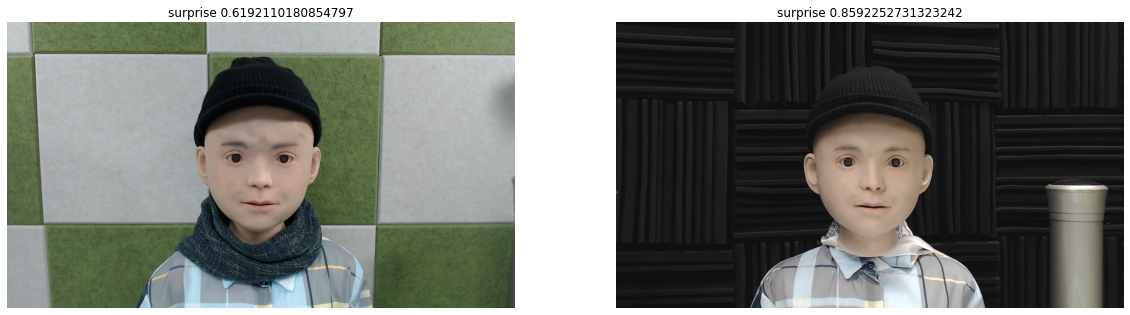

In [19]:
import pandas as pd
from feat import Detector
import os
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from resmasknet import ResMaskNet

detector = Detector(emotion_model = "resmasknet", landmark_model='mobilefacenet')

def get_box(start_x, start_y, end_x, end_y):
    center_x, center_y = (start_x + end_x) // 2, (start_y + end_y) // 2
    square_length = ((end_x - start_x) + (end_y - start_y)) // 2 // 2
    square_length *= 1.1
    start_x = int(center_x - square_length)
    start_y = int(center_y - square_length)
    end_x = int(center_x + square_length)
    end_y = int(center_y + square_length)
    return start_x, start_y, end_x, end_y
def ensure_color(image):
    if len(image.shape) == 2:
        return np.dstack([image] * 3)
    elif image.shape[2] == 1:
        return np.dstack([image] * 3)
    return image
    
# old
image_name = 'image_analysis/231225Exp17NewFeat/prototypes/surprise/Prototype_surprise_test.png'
target_emotion = 'surprise'

facebox = detector.detect_faces(cv2.imread(image_name))[0][:4]
rmn_model = ResMaskNet()
print(image_name)
print(facebox)
rmn_res = rmn_model.detect_emo(frame=cv2.imread(image_name), detected_face=[facebox])
new_df = pd.DataFrame(rmn_res, columns=["anger", "disgust", "fear", "happiness", "sadness", "surprise", "neutral"])
new_df['input'] = image_name

print(new_df)
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Original image
testframe = cv2.imread(image_name)
b,g,r = cv2.split(testframe)
frame_rgb = cv2.merge((r,g,b))
axes[0].imshow(frame_rgb)
axes[0].set_title(f'{target_emotion} {list(new_df[target_emotion])[0]}')
axes[0].axis("off")


image_name = 'image_analysis/241122Exp31Mixed_v4_alpha0.6_300/surprise/2024_11_22_17_30_28_surprise_1.png'

facebox = detector.detect_faces(cv2.imread(image_name))[0][:4]
rmn_model = ResMaskNet()
print(image_name)
print(facebox)
rmn_res = rmn_model.detect_emo(frame=cv2.imread(image_name), detected_face=[facebox])
new_df = pd.DataFrame(rmn_res, columns=["anger", "disgust", "fear", "happiness", "sadness", "surprise", "neutral"])
new_df['input'] = image_name

face = cv2.imread(image_name)
b,g,r = cv2.split(face)
face_rgb = cv2.merge((r,g,b))
axes[1].imshow(face_rgb)
axes[1].set_title(f'{target_emotion} {list(new_df[target_emotion])[0]}')
axes[1].axis("off")


Loading Face Detection model:  retinaface
Using downloaded and verified file: /home/dongagent/anaconda3/envs/py37pyfeat1/lib/python3.7/site-packages/py_feat-0.3.7-py3.7.egg/feat/resources/mobilenet0.25_Final.pth
Using downloaded and verified file: /home/dongagent/anaconda3/envs/py37pyfeat1/lib/python3.7/site-packages/py_feat-0.3.7-py3.7.egg/feat/resources/mobilefacenet_model_best.pth.tar
Using downloaded and verified file: /home/dongagent/anaconda3/envs/py37pyfeat1/lib/python3.7/site-packages/py_feat-0.3.7-py3.7.egg/feat/resources/hog_pca_all_emotio.joblib
Using downloaded and verified file: /home/dongagent/anaconda3/envs/py37pyfeat1/lib/python3.7/site-packages/py_feat-0.3.7-py3.7.egg/feat/resources/hog_pca_all_emotio.joblib
Using downloaded and verified file: /home/dongagent/anaconda3/envs/py37pyfeat1/lib/python3.7/site-packages/py_feat-0.3.7-py3.7.egg/feat/resources/hog_scalar_aus.joblib
Using downloaded and verified file: /home/dongagent/anaconda3/envs/py37pyfeat1/lib/python3.7/site

/home/dongagent/anaconda3/envs/py37pyfeat1/lib/python3.7/site-packages/sklearn/base.py:333: UserWarning: Trying to unpickle estimator PCA from version 0.24.1 when using version 1.0.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
/home/dongagent/anaconda3/envs/py37pyfeat1/lib/python3.7/site-packages/sklearn/base.py:333: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.24.1 when using version 1.0.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
/home/dongagent/anaconda3/envs/py37pyfeat1/lib/python3.7/site-packages/sklearn/base.py:333: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0

Loading emotion model:  resmasknet
image_analysis/Exp_collections/230210Exp13Lighting_sys_500/anger/2023_02_10_15_30_46_anger_490.png
[225.78351, 101.01229, 417.9461, 375.38892]
      anger  disgust      fear  happiness   sadness  surprise   neutral  \
0  0.596219   0.0428  0.309349   0.000837  0.012263   0.03205  0.006482   

                                               input  
0  image_analysis/Exp_collections/230210Exp13Ligh...  
image_analysis/241122Exp31Mixed_v4_alpha0.6_300/anger_v4/2024_11_22_15_49_33_anger_2.png
[512.62964, 231.89864, 771.0755, 548.78204]


(-0.5, 1279.5, 719.5, -0.5)

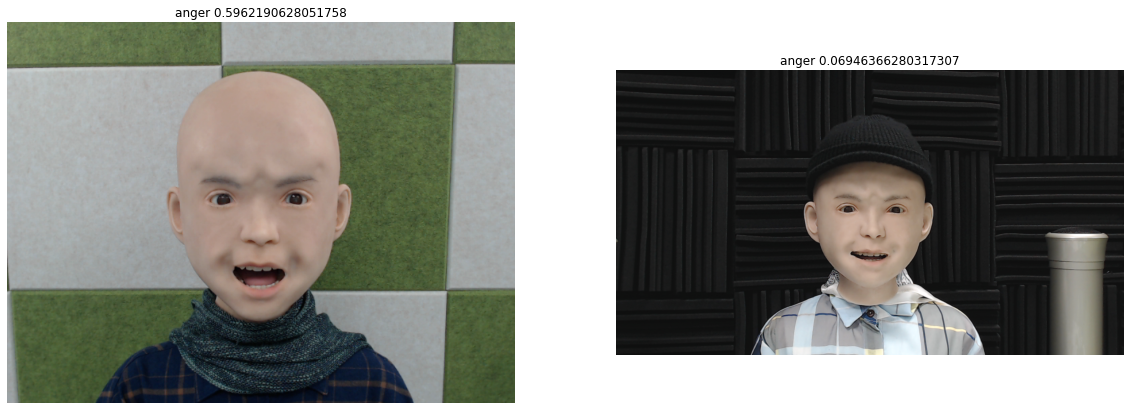

In [15]:
import pandas as pd
from feat import Detector
import os
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from resmasknet import ResMaskNet

detector = Detector(emotion_model = "resmasknet", landmark_model='mobilefacenet')

def get_box(start_x, start_y, end_x, end_y):
    center_x, center_y = (start_x + end_x) // 2, (start_y + end_y) // 2
    square_length = ((end_x - start_x) + (end_y - start_y)) // 2 // 2
    square_length *= 1.1
    start_x = int(center_x - square_length)
    start_y = int(center_y - square_length)
    end_x = int(center_x + square_length)
    end_y = int(center_y + square_length)
    return start_x, start_y, end_x, end_y
def ensure_color(image):
    if len(image.shape) == 2:
        return np.dstack([image] * 3)
    elif image.shape[2] == 1:
        return np.dstack([image] * 3)
    return image
def get_target(emotion_name):
    # Anger, Disgust, Fear, Happiness, Sadness, Surprise, Neutral
    # or lowercase
    if emotion_name in ["Anger", "anger"]:
        return 0
    elif emotion_name in ["Disgust", "disgust"]:
        return 1
    elif emotion_name in ["Fear", "fear"]:
        return 2
    elif emotion_name in ["Happiness", "happiness"]:
        return 3
    elif emotion_name in ["Sadness", "sadness"]:
        return 4
    elif emotion_name in ["Surprise", "surprise"]:
        return 5
    elif emotion_name in ["Neutral", "neutral"]:
        return 6
    
# old
image_name = 'image_analysis/Exp_collections/230210Exp13Lighting_sys_500/anger/2023_02_10_15_30_46_anger_490.png'
target_emotion = 'anger'

facebox = detector.detect_faces(cv2.imread(image_name))[0][:4]
rmn_model = ResMaskNet()
targetID = get_target(target_emotion)
print(image_name)
print(facebox)
rmn_res = rmn_model.detect_emo(frame=cv2.imread(image_name), detected_face=[facebox])
new_df = pd.DataFrame(rmn_res, columns=["anger", "disgust", "fear", "happiness", "sadness", "surprise", "neutral"])
new_df['input'] = image_name

print(new_df)
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Original image
testframe = cv2.imread(image_name)
b,g,r = cv2.split(testframe)
frame_rgb = cv2.merge((r,g,b))
axes[0].imshow(frame_rgb)
axes[0].set_title(f'{target_emotion} {list(new_df[target_emotion])[0]}')
axes[0].axis("off")


image_name = 'image_analysis/241122Exp31Mixed_v4_alpha0.6_300/anger_v4/2024_11_22_15_49_33_anger_2.png'


facebox = detector.detect_faces(cv2.imread(image_name))[0][:4]
rmn_model = ResMaskNet()
targetID = get_target(target_emotion)
print(image_name)
print(facebox)
rmn_res = rmn_model.detect_emo(frame=cv2.imread(image_name), detected_face=[facebox])
new_df = pd.DataFrame(rmn_res, columns=["anger", "disgust", "fear", "happiness", "sadness", "surprise", "neutral"])
new_df['input'] = image_name

face = cv2.imread(image_name)
b,g,r = cv2.split(face)
face_rgb = cv2.merge((r,g,b))
axes[1].imshow(face_rgb)
axes[1].set_title(f'{target_emotion} {list(new_df[target_emotion])[0]}')
axes[1].axis("off")


In [26]:
# use original frame

image_name = 'image_analysis/241122Exp31Mixed_v4_alpha0.6_300/anger_v4/2024_11_22_15_51_42_anger_53.png'
target_emotion = 'anger'

facebox = detector.detect_faces(cv2.imread(image_name))[0][:4]
rmn_model = ResMaskNet()
print(image_name)
print(facebox)
# [514.5925, 232.90952, 771.5646, 547.8692]

start_x, start_y, end_x, end_y = get_box(facebox[0], facebox[1], facebox[2], facebox[3])
print(f'start_x, start_y, end_x, end_y = {start_x}, {start_y}, {end_x}, {end_y}')

ori_facebox = pd.read_csv(image_name[:-4]+'_intensitynet.csv')

start_x, start_y, end_x, end_y = get_box(ori_facebox['start_x'], ori_facebox['start_y'], ori_facebox['end_x'], ori_facebox['end_y'])
print(f'start_x, start_y, end_x, end_y = {start_x}, {start_y}, {end_x}, {end_y}')


rmn_res = rmn_model.detect_emo(frame=cv2.imread(image_name), detected_face=[facebox])
new_df = pd.DataFrame(rmn_res, columns=["anger", "disgust", "fear", "happiness", "sadness", "surprise", "neutral"])
new_df['input'] = image_name

print(new_df)
# anger   disgust      fear  happiness   sadness  surprise   neutral  \
# 0  0.078917  0.001456  0.093224   0.000875  0.007193  0.774837  0.043498

feat_res = detector.detect_image(image_name)
print(feat_res.iloc[-9:])

image_analysis/241122Exp31Mixed_v4_alpha0.6_300/anger_v4/2024_11_22_15_51_42_anger_53.png
[514.5925, 232.90952, 771.5646, 547.8692]
start_x, start_y, end_x, end_y = 486, 233, 799, 546
start_x, start_y, end_x, end_y = 495, 260, 786, 551
      anger   disgust      fear  happiness   sadness  surprise   neutral  \
0  0.078917  0.001456  0.093224   0.000875  0.007193  0.774837  0.043498   

                                               input  
0  image_analysis/241122Exp31Mixed_v4_alpha0.6_30...  
  frame   FaceRectX   FaceRectY  FaceRectWidth  FaceRectHeight  FaceScore  \
0     0  514.592529  232.909515     256.972046      314.959686   0.999906   

          x_0         x_1       x_2        x_3  ...      AU28      AU43  \
0  505.492255  508.783606  514.8368  522.70397  ...  0.070059  0.024823   

      anger   disgust      fear  happiness   sadness  surprise   neutral  \
0  0.078917  0.001456  0.093224   0.000875  0.007193  0.774837  0.043498   

                                          

In [24]:
# old
image_name = 'image_analysis/241122Exp31Mixed_v4_alpha0.6_300/anger_v4/top_images/1_0.9877_2024_11_22_15_51_42_anger_53.png'
target_emotion = 'anger'

facebox = detector.detect_faces(cv2.imread(image_name))[0][:4]
rmn_model = ResMaskNet()
print(image_name)
print(facebox)
# [514.5925, 232.90952, 771.5646, 547.8692]

start_x, start_y, end_x, end_y = get_box(facebox[0], facebox[1], facebox[2], facebox[3])
print(f'start_x, start_y, end_x, end_y = {start_x}, {start_y}, {end_x}, {end_y}')


rmn_res = rmn_model.detect_emo(frame=cv2.imread(image_name), detected_face=[facebox])
new_df = pd.DataFrame(rmn_res, columns=["anger", "disgust", "fear", "happiness", "sadness", "surprise", "neutral"])
new_df['input'] = image_name

print(new_df)
# anger   disgust      fear  happiness   sadness  surprise   neutral  \
# 0  0.078917  0.001456  0.093224   0.000875  0.007193  0.774837  0.043498

feat_res = detector.detect_image(image_name)
print(feat_res.iloc[-9:])

image_analysis/241122Exp31Mixed_v4_alpha0.6_300/anger_v4/top_images/1_0.9877_2024_11_22_15_51_42_anger_53.png
[514.5925, 232.90952, 771.5646, 547.8692]
start_x, start_y, end_x, end_y = 486, 233, 799, 546
      anger   disgust      fear  happiness   sadness  surprise   neutral  \
0  0.078917  0.001456  0.093224   0.000875  0.007193  0.774837  0.043498   

                                               input  
0  image_analysis/241122Exp31Mixed_v4_alpha0.6_30...  
  frame   FaceRectX   FaceRectY  FaceRectWidth  FaceRectHeight  FaceScore  \
0     0  514.592529  232.909515     256.972046      314.959686   0.999906   

          x_0         x_1       x_2        x_3  ...      AU28      AU43  \
0  505.492255  508.783606  514.8368  522.70397  ...  0.070059  0.024823   

      anger   disgust      fear  happiness   sadness  surprise   neutral  \
0  0.078917  0.001456  0.093224   0.000875  0.007193  0.774837  0.043498   

                                               input  
0  image_analysis/2

(-0.5, 312.5, 312.5, -0.5)

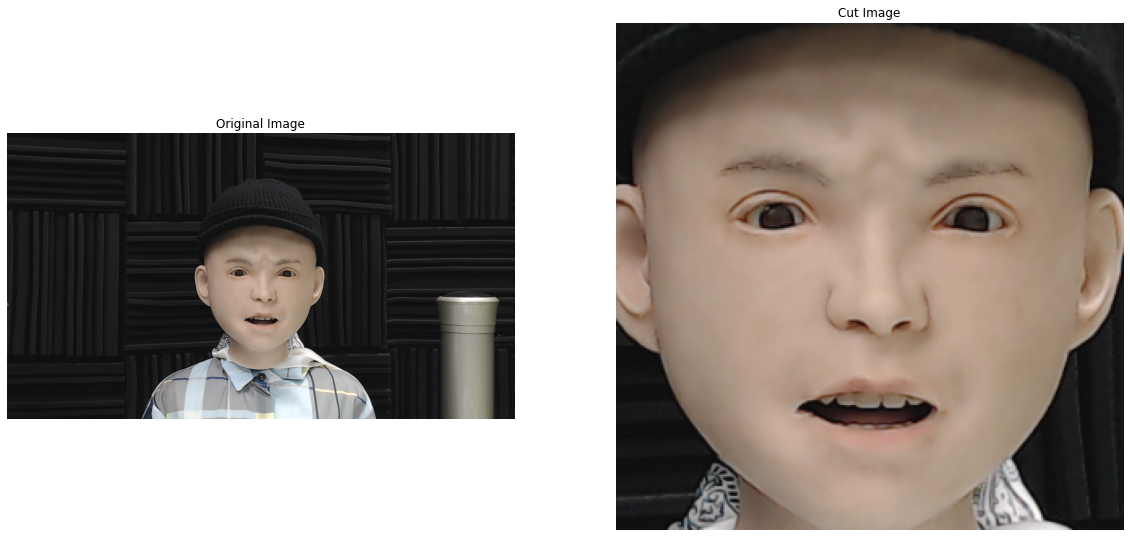

In [23]:
# Display the original and cropped images side by side
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
# Original image
testframe = cv2.imread(image_name)

b,g,r = cv2.split(testframe)
frame_rgb = cv2.merge((r,g,b))
axes[0].imshow(frame_rgb)
axes[0].set_title("Original Image")
axes[0].axis("off")
# # Cropped image
# axes[1].imshow(face)
# axes[1].set_title("Cropped Image")
# axes[1].axis("off")

# cv2.resize()

face = testframe[start_y:end_y, start_x:end_x]
face = ensure_color(face)
b,g,r = cv2.split(face)
face_rgb = cv2.merge((r,g,b))
axes[1].imshow(face_rgb)
axes[1].set_title("Cut Image")
axes[1].axis("off")

In [ ]:
# -----------
# old version
# -----------
image_prediction = detector.detect_image(image_name)
df = image_prediction.head()

In [ ]:
facebox = detector.detect_faces(testframe)[0]
print(facebox)
start_x, start_y, end_x, end_y = get_box(facebox[0], facebox[1], facebox[2], facebox[3])
print(f'start_x, start_y, end_x, end_y = {start_x}, {start_y}, {end_x}, {end_y}')
523, 258, 748, 483
504, 322, 721, 539
# 193, 111, 448, 366


# Display the original and cropped images side by side
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
# Original image
b,g,r = cv2.split(testframe)
frame_rgb = cv2.merge((r,g,b))
axes[0].imshow(frame_rgb)
axes[0].set_title("Original Image")
axes[0].axis("off")
# # Cropped image
# axes[1].imshow(face)
# axes[1].set_title("Cropped Image")
# axes[1].axis("off")

# cv2.resize()

face = testframe[start_y:end_y, start_x:end_x]
face = ensure_color(face)
b,g,r = cv2.split(face)
face_rgb = cv2.merge((r,g,b))
axes[1].imshow(face_rgb)
axes[1].set_title("Cut Image")
axes[1].axis("off")